<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/notebooks2025/section03_data_process_dim_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Section 3:__ Data Processing, Dimension Reduction and Visualization

## load packages and github repo

In [1]:
!git clone https://github.com/Ken-Lau-Lab/single-cell-lectures  # for Colab users

Cloning into 'single-cell-lectures'...
remote: Enumerating objects: 385, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 385 (delta 107), reused 166 (delta 72), pack-reused 176 (from 1)
Receiving objects: 100% (385/385), 217.26 MiB | 10.88 MiB/s, done.
Resolving deltas: 100% (193/193), done.
Updating files: 100% (30/30), done.


In [2]:
!pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=2c045ff7adcceee5a13eaee6a9ec33347610c698a5a14f652c245190948db476
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info


In [1]:
!pip install matplotlib==3.7.1

In [2]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 44.8 MB/s eta 0:00:00


In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

### read in data

In [4]:
dat = sc.read('single-cell-lectures/data/Example_Data_L3.h5ad')
#dat = sc.read('./data/Example_Data_L3.h5ad')

## Data Processing

In [5]:
def normalization( dat_ct):
    """this function normalize the data so that each cell has the same
    number of total counts as the median value of the total counts among all cells.
    The data will also be log-like transformed
    Count values will also be transformed to z-scores for each gene"""
    sc.pp.normalize_total(dat_ct)
    dat_ct.X = np.arcsinh(dat_ct.X).copy()
    dat_ct.layers['arcsinh'] = dat_ct.X.copy()
    sc.pp.scale(dat_ct)

    return dat_ct

In [10]:
dat.raw = dat.copy() # save a raw layer # this is critical for homework*****

In [11]:
dat.to_df().iloc[100:105, 9000:9010]

,RASSF7,RAVER1,RAVER2,RB1,RB1CC1,RBBP4,RBBP5,RBBP6,RBBP7,RBBP8
TGACTGGTGCACCCTAACC,-0.280488,-0.103334,-0.502596,-0.377638,0.523756,-0.386509,-0.280821,-0.424114,-0.323547,2.204609
TGACGTAGAAGCTTTAATC,-0.280488,-0.103334,-0.502596,-0.377638,-0.482523,-0.386509,-0.280821,2.788866,4.165315,-0.251074
AGCCAAGATTGGTATGA,-0.280488,14.854852,2.757277,-0.377638,-0.482523,2.772768,-0.280821,-0.424114,3.728795,-0.251074
TGAGGTCTGACCCGTGTTT,-0.280488,-0.103334,-0.502596,-0.377638,-0.482523,-0.386509,-0.280821,4.042510,-0.323547,-0.251074
TAGCCTCGGAGCGGTA,3.184663,-0.103334,0.877694,2.208826,-0.482523,-0.386509,-0.280821,-0.424114,-0.323547,-0.251074


In [8]:
normalization( dat)

AnnData object with n_obs × n_vars = 461 × 13583
    var: 'mean', 'std'
    layers: 'arcsinh'

In [9]:
dat.to_df().iloc[100:105, 9000:9010]

,RASSF7,RAVER1,RAVER2,RB1,RB1CC1,RBBP4,RBBP5,RBBP6,RBBP7,RBBP8
TGACTGGTGCACCCTAACC,-0.280488,-0.103334,-0.502596,-0.377638,0.523756,-0.386509,-0.280821,-0.424114,-0.323547,2.204609
TGACGTAGAAGCTTTAATC,-0.280488,-0.103334,-0.502596,-0.377638,-0.482523,-0.386509,-0.280821,2.788866,4.165315,-0.251074
AGCCAAGATTGGTATGA,-0.280488,14.854852,2.757277,-0.377638,-0.482523,2.772768,-0.280821,-0.424114,3.728795,-0.251074
TGAGGTCTGACCCGTGTTT,-0.280488,-0.103334,-0.502596,-0.377638,-0.482523,-0.386509,-0.280821,4.042510,-0.323547,-0.251074
TAGCCTCGGAGCGGTA,3.184663,-0.103334,0.877694,2.208826,-0.482523,-0.386509,-0.280821,-0.424114,-0.323547,-0.251074


## Dimension Reduction

In [12]:
n_neighbors = int( np.sqrt(dat.n_obs) ) # an optimal number for k in KNN

In [13]:
sc.tl.pca(dat, return_info=False, use_highly_variable = False ) #PCA

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [14]:
sc.pp.neighbors( dat, n_neighbors= n_neighbors , n_pcs=50, ) # make neighborhood graph

In [15]:
sc.tl.umap(dat, random_state=0) # this will make the UMAP

In [16]:
sc.tl.leiden( dat, resolution = 0.7)

<ipython-input-16-9e0c34c5590b>:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden( dat, resolution = 0.7)


In [17]:
dat

AnnData object with n_obs × n_vars = 461 × 13583
    obs: 'leiden'
    var: 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh'
    obsp: 'distances', 'connectivities'

In [18]:
dat.varm["PCs"].shape

(13583, 50)

In [ ]:
dat.varm["PCs"][0:5, 0:5]

array([[ 0.01534656,  0.01825429, -0.00214323,  0.00939627, -0.00665326],
       [-0.00977972, -0.00542018, -0.00046088,  0.0055393 ,  0.00218566],
       [ 0.00187079,  0.00866739, -0.00260812,  0.00233425, -0.00119323],
       [ 0.00299765,  0.00336016,  0.01155719, -0.00334567,  0.00940649],
       [ 0.00128106,  0.00175568,  0.00772175, -0.00012081,  0.00594929]],
      dtype=float32)

## Visualization

In [19]:
sc.set_figure_params(figsize=[4,4])

In [20]:
ne_markers = ['CD8A',  'CD4', 'JCHAIN', 'COL1A1'] # Non-epithelial cell markers

In [21]:
markers = ['GUCA2A',  'OLFM4', 'MKI67',  'MUC2', 'CHGA', 'DCLK1'] # epithelial cell type markers

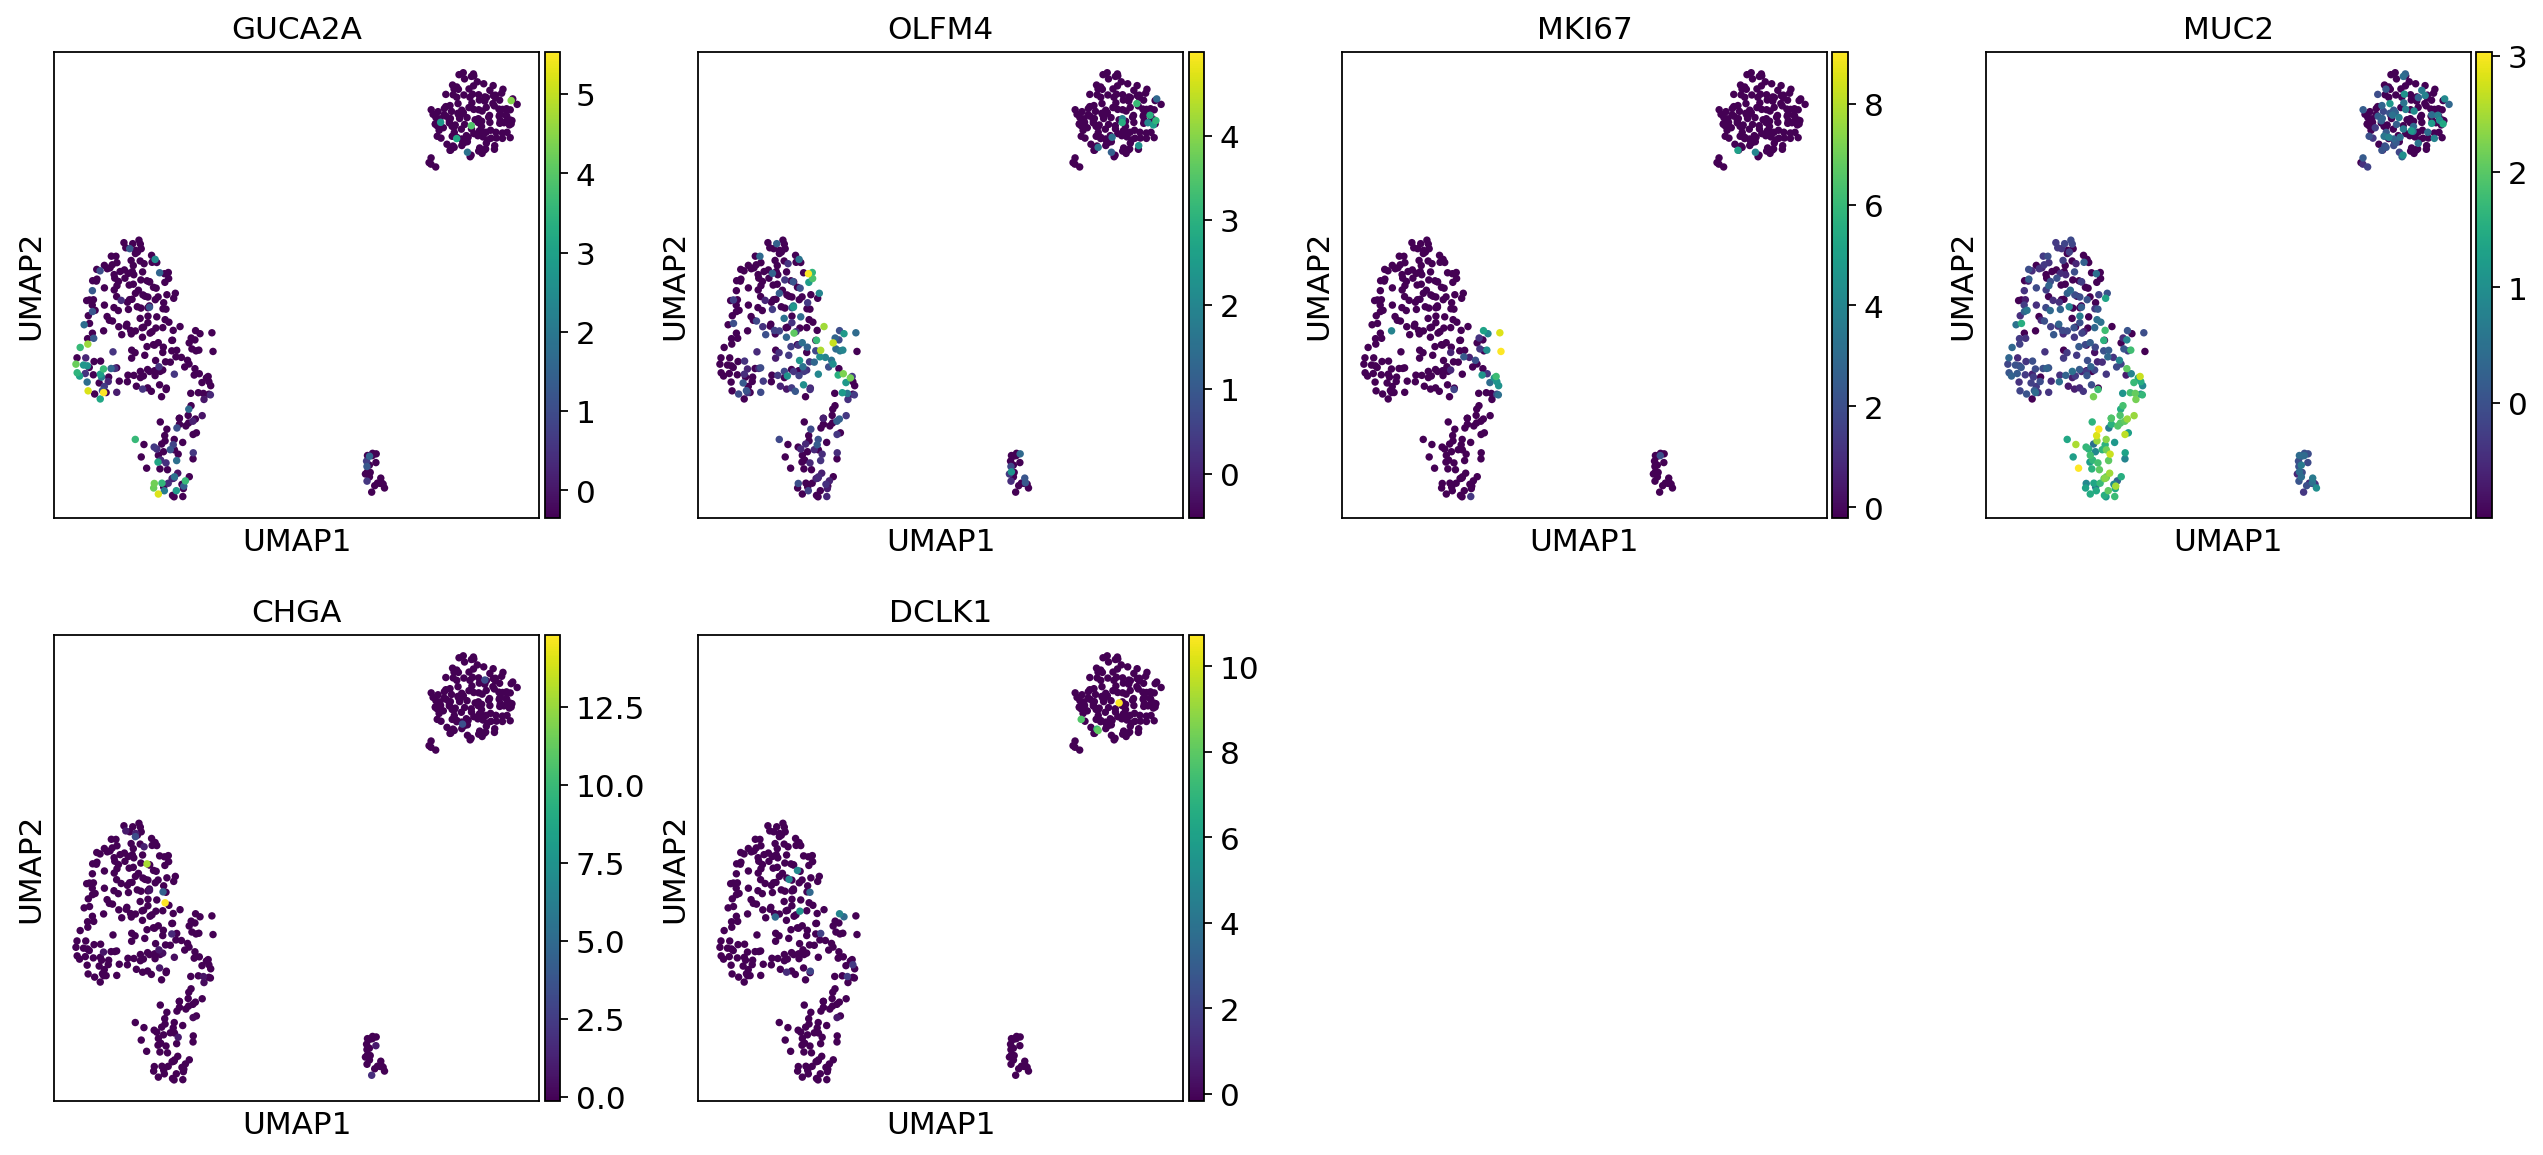

In [25]:
sc.pl.umap( dat, color = markers, use_raw = False, s = 45, cmap = 'viridis') #we use raw = false so that we are looking at normalized data, not raw counts which
#have far larger spread

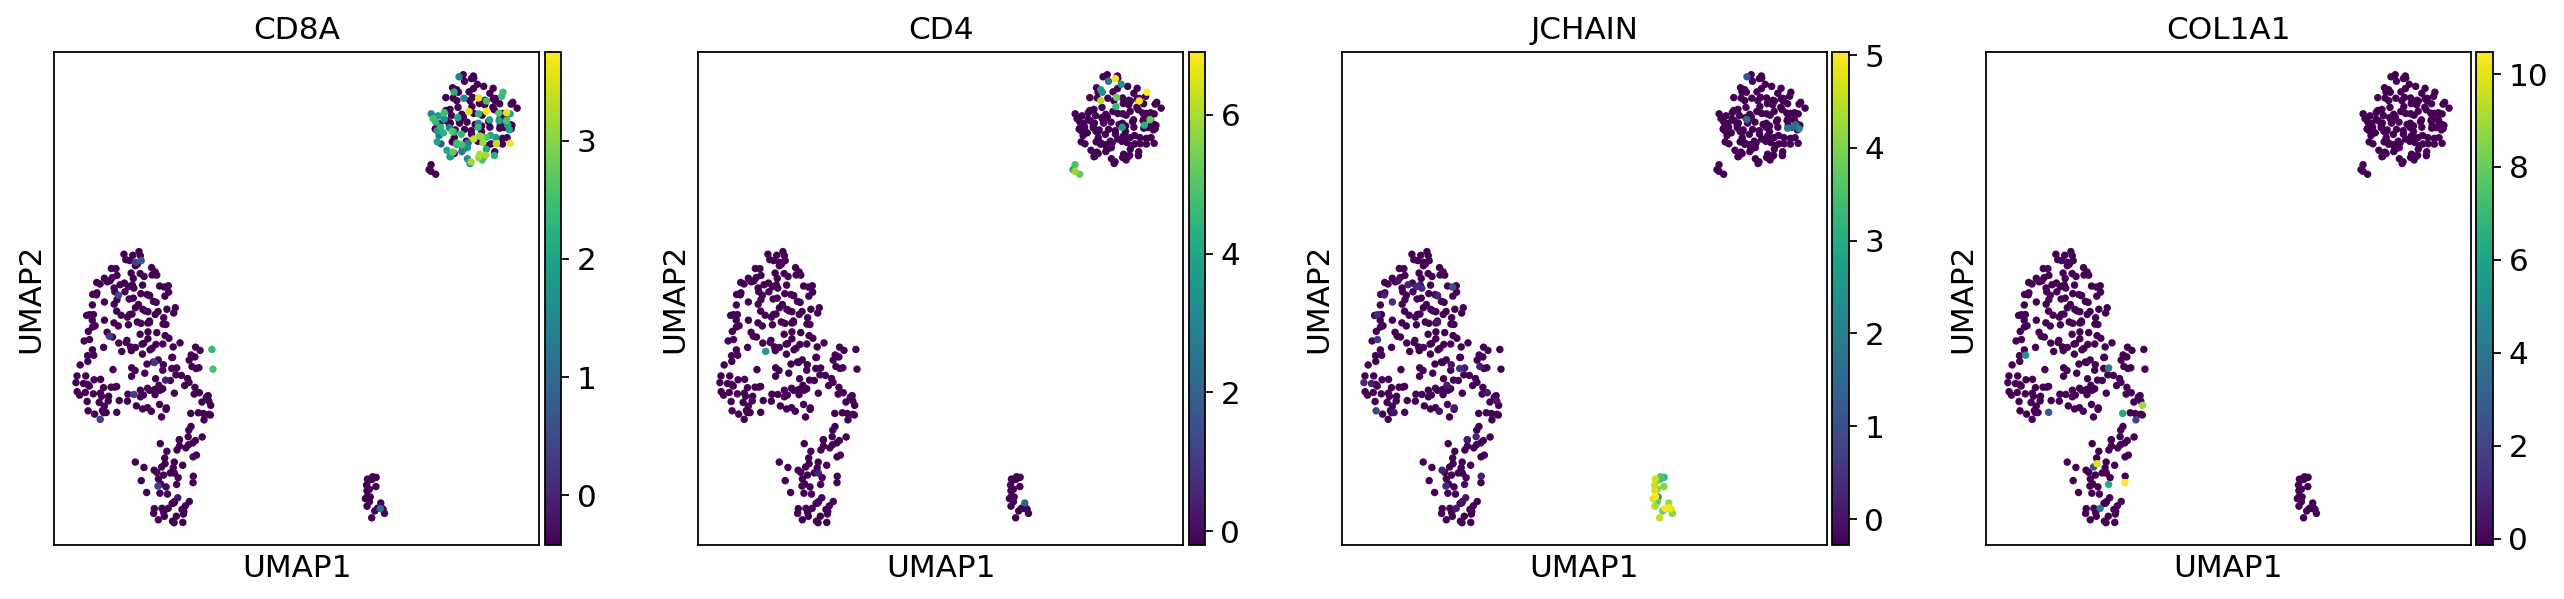

In [26]:
sc.pl.umap( dat, color = ne_markers , use_raw = False, s = 45, cmap = 'viridis' )

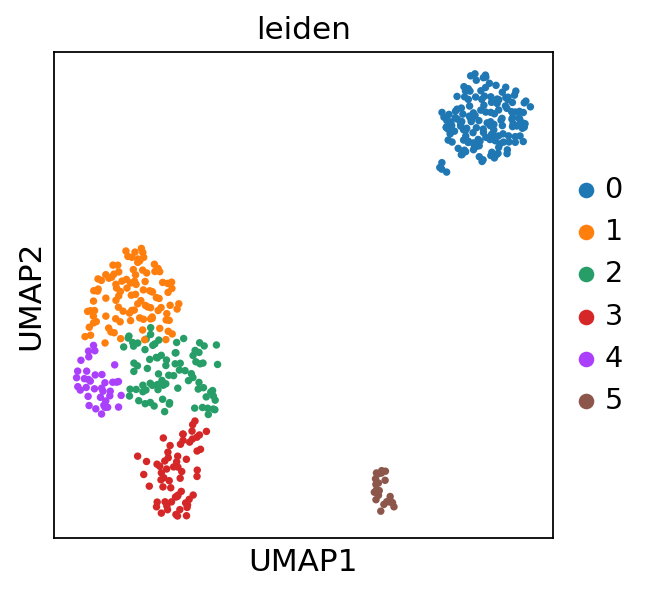

In [27]:
sc.pl.umap(dat, color = 'leiden', s = 45 ) # this shows us assignments of the clusters (lieden clusters).

## Differential gene expression
- For clusters computed from unsupervised algorithm, we want to know what they mean biologically
- DGE provides insight into cell states, subtypes or novel cell clusters etc.

In [24]:
sc.tl.rank_genes_groups( dat, groupby='leiden', use_raw= False, layer='arcsinh', key_added='leiden_cluster', method= 'wilcoxon' )

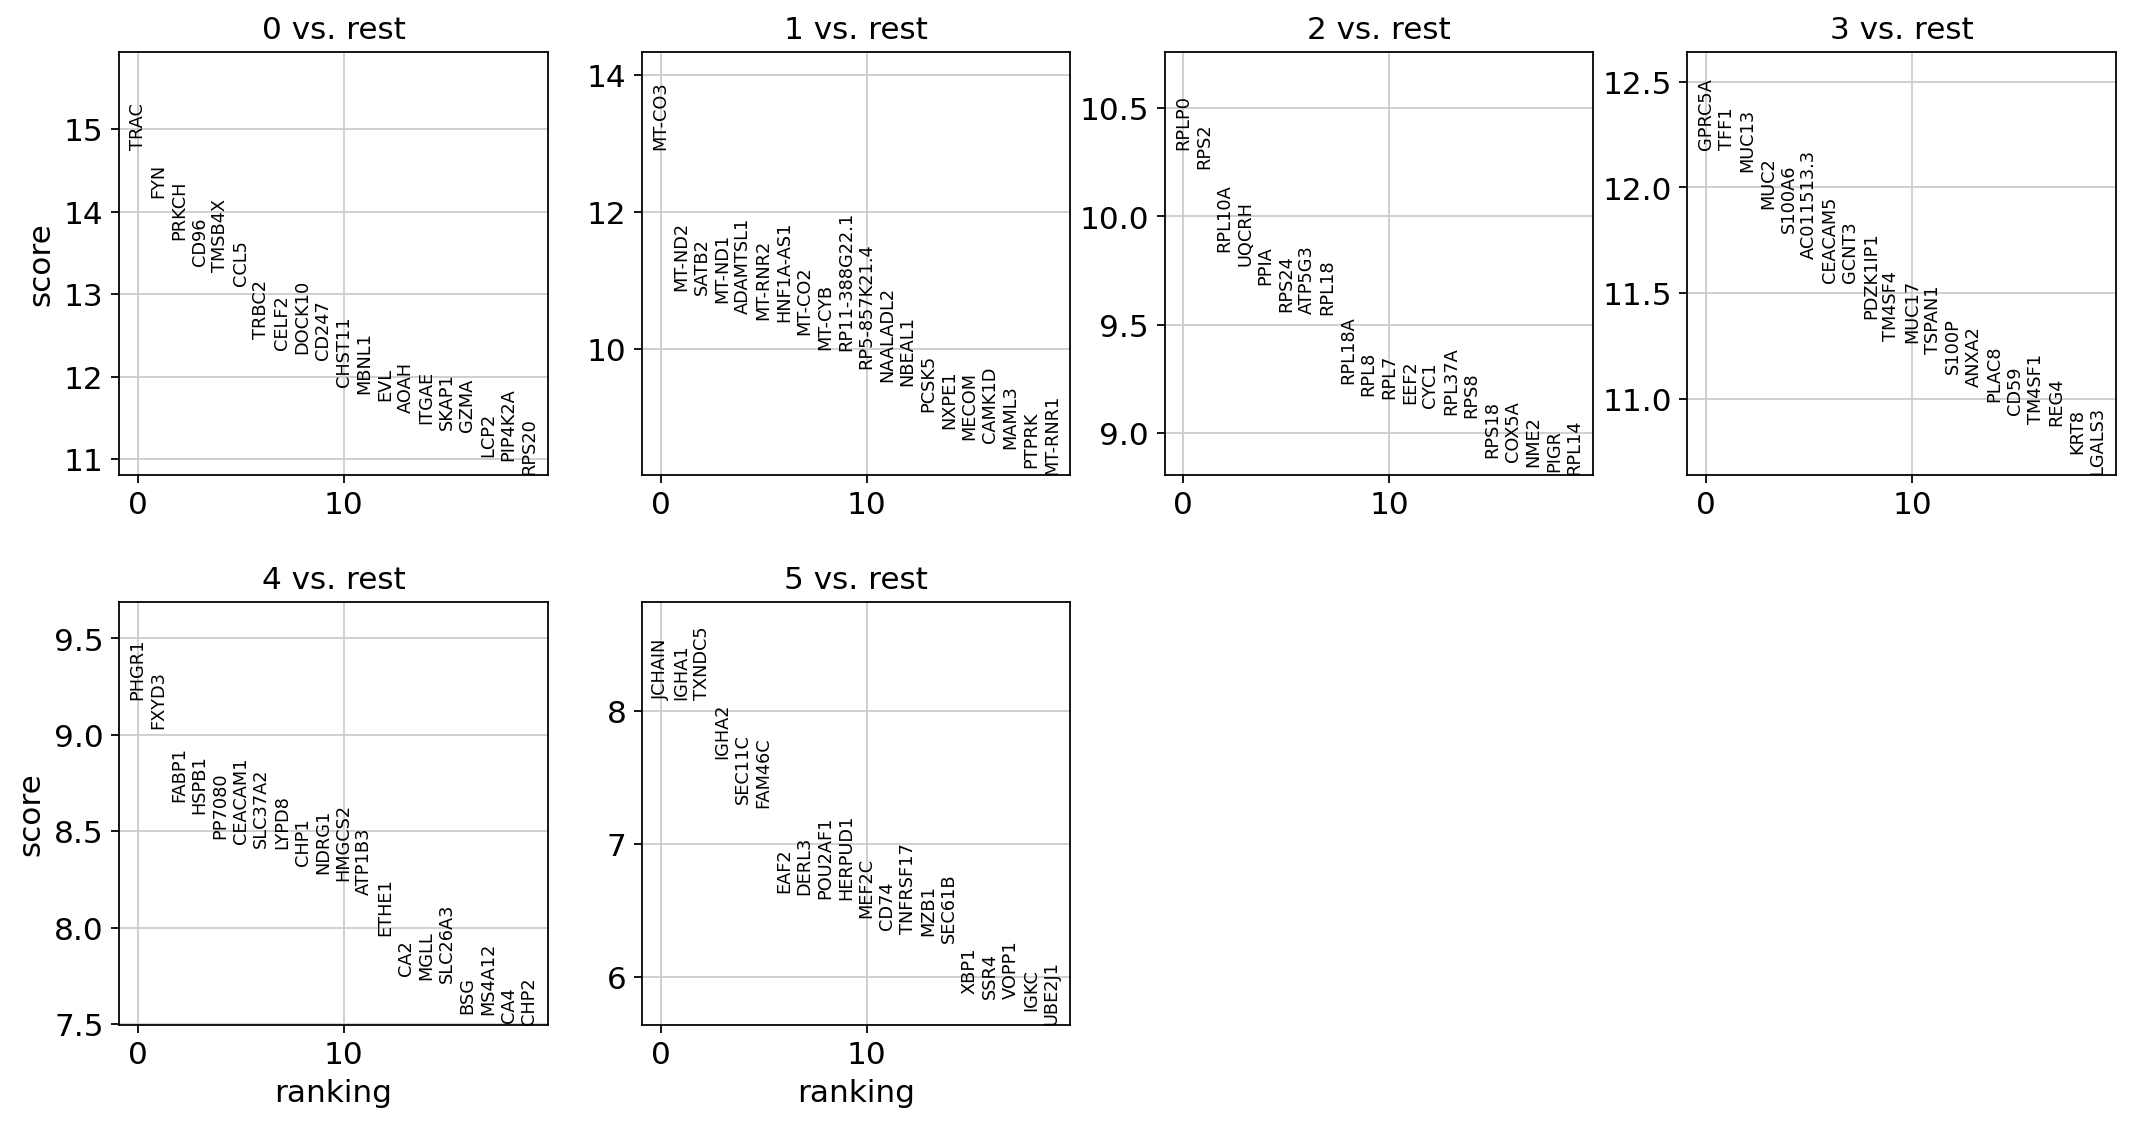

In [ ]:
sc.pl.rank_genes_groups( dat, key='leiden_cluster', sharey= False )